In [21]:
# Import pandas
import pandas as pd

# File paths
categories_file = "/Users/macbookpro/Desktop/Project/Resources/amazon_categories.csv"
products_file = "/Users/macbookpro/Desktop/Project/Resources/amazon_products.csv"

# Load the files
categories_df = pd.read_csv(categories_file)
products_df = pd.read_csv(products_file)

# Print column names for debugging
print("Categories Columns:", categories_df.columns)
print("Products Columns:", products_df.columns)

Categories Columns: Index(['id', 'category_name'], dtype='object')
Products Columns: Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')


In [27]:
# Merge the data using the correct columns
merged_df = pd.merge(products_df, categories_df, left_on="category_id", right_on="id")

# Count best-sellers by category
best_sellers_count = merged_df.groupby('category_name')['isBestSeller'].sum()

# Find the categories with the most and least best-sellers
max_best_sellers = best_sellers_count.idxmax()
min_best_sellers = best_sellers_count.idxmin()

print(f"Category with most best-sellers: {max_best_sellers} ({best_sellers_count[max_best_sellers]})")
print(f"Category with least best-sellers: {min_best_sellers} ({best_sellers_count[min_best_sellers]})")

Category with most best-sellers: Sports & Fitness (483)
Category with least best-sellers: Automotive Enthusiast Merchandise (0)


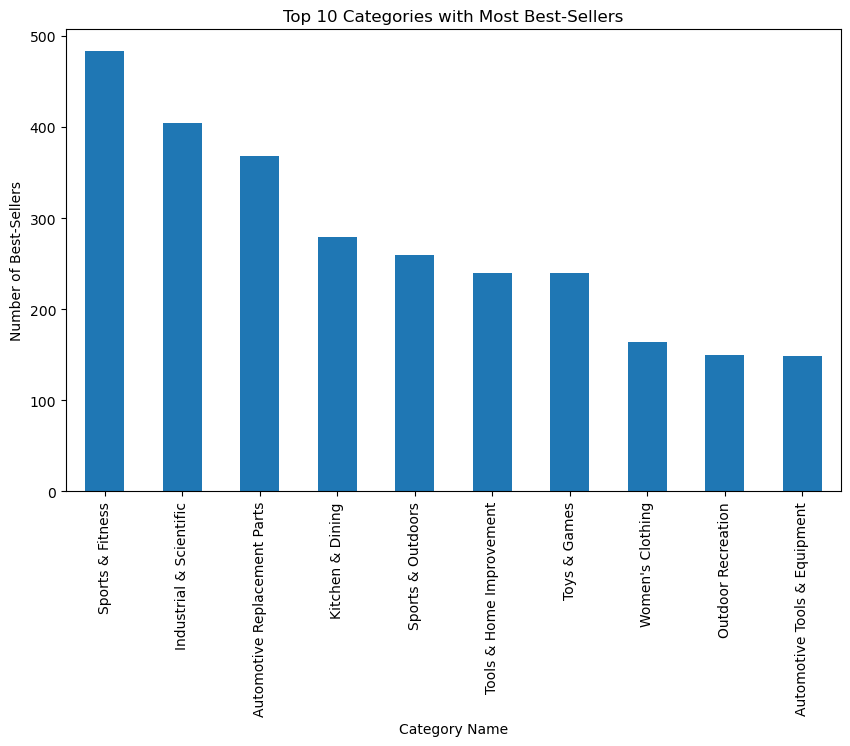

In [31]:
import matplotlib.pyplot as plt

# Plot top 10 categories
top_categories = best_sellers_count.sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', figsize=(10, 6), title="Top 10 Categories with Most Best-Sellers")
plt.ylabel("Number of Best-Sellers")
plt.xlabel("Category Name")
plt.show()

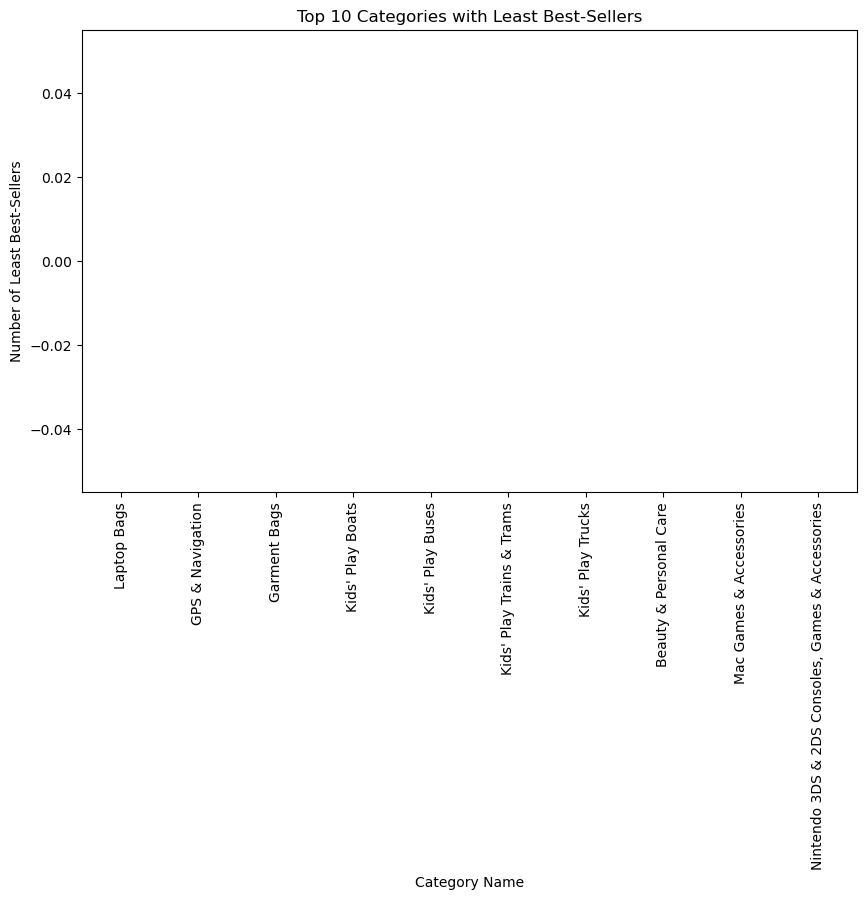

In [35]:
# Plot bottom 10 categories
top_categories = best_sellers_count.sort_values(ascending=True).head(10)
top_categories.plot(kind='bar', figsize=(10, 6), title="Top 10 Categories with Least Best-Sellers")
plt.ylabel("Number of Least Best-Sellers")
plt.xlabel("Category Name")
plt.show()